# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
# Cargamos el csv
df_BCSC <- read.csv("./datos/BCSC_risk_factors_summarized.csv", sep = ",")
head(df_BCSC)

# Expandimos las filas
df_BCSC_expanded <- df_BCSC[rep(seq(nrow(df_BCSC)), df_BCSC$count),]
paste("Filas iniciales:",nrow(df_BCSC))
paste("Filas tras la expansion:",nrow(df_BCSC_expanded))

year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
2000,1,1,0,0,0,1,0,1,3,0,0,1
2000,1,1,0,0,1,3,0,1,2,0,0,1
2000,1,1,0,0,1,4,0,1,1,0,0,2
2000,1,1,0,0,2,3,0,1,1,0,0,1
2000,1,1,0,0,2,3,0,1,1,1,9,1
2000,1,1,0,0,4,9,0,1,1,0,0,1


[1] "Filas iniciales: 1144564"

[1] "Filas tras la expansion: 6318638"

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [2]:
# Definimos una semilla común para todos:
set.seed(12345)
# Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
df_sample <- df_BCSC_expanded[sample(nrow(df_BCSC_expanded), 5000), ]
nrow(df_sample)
head(df_sample)

[1] 5000

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
792997.89,2006,8,9,9,9,9,2,9,2,9,0,0,218
986739.194,2008,7,2,0,9,9,2,0,2,9,0,0,771
845393.799,2007,5,1,0,9,9,2,0,1,9,0,0,877
996805.11,2008,8,1,1,1,1,2,0,2,2,0,0,32
481428.71,2004,3,1,0,9,9,3,0,1,2,0,0,97
169906.1,2001,6,5,0,9,9,1,1,2,3,0,0,11


Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [3]:
# Definimos las columnas que nos interesan
columnas <- c("race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history")
for (columna in columnas) {
    # Sabemos que todos los 9's de estas columnas deben ser NA
    df_sample[df_sample[columna] == 9,columna] <- NA
    # Etiquetamos todas las columnas que solo tengan estos 3 valores: 0 = No; 1 = Sí; 9 = Desconocido
    unicos <- unique(df_sample[,columna])
    if(length(unicos) == 3 & sum(unicos %in% c(0,1,NA)) == 3) {
        print(columna)
        df_sample[,columna] <- factor(df_sample[,columna], labels=c("NO","SI"))
    }
    # El resto las factorizamos pero sin etiquetas
    else {
        df_sample[,columna] <- factor(df_sample[,columna])
    }
}
head(df_sample)
str(df_sample)

[1] "first_degree_hx"
[1] "current_hrt"
[1] "biophx"
[1] "breast_cancer_history"


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
792997.89,2006,8,NA,NA,NA,NA,2,NA,2,NA,NO,NO,218
986739.194,2008,7,2,NO,NA,NA,2,NO,2,NA,NO,NO,771
845393.799,2007,5,1,NO,NA,NA,2,NO,1,NA,NO,NO,877
996805.11,2008,8,1,SI,1,1,2,NO,2,2,NO,NO,32
481428.71,2004,3,1,NO,NA,NA,3,NO,1,2,NO,NO,97
169906.1,2001,6,5,NO,NA,NA,1,SI,2,3,NO,NO,11


'data.frame':	5000 obs. of  13 variables:
 $ year                 : int  2006 2008 2007 2008 2004 2001 2002 2004 2006 2009 ...
 $ age_group_5_years    : int  8 7 5 8 3 6 10 6 9 10 ...
 $ race_eth             : Factor w/ 6 levels "1","2","3","4",..: NA 2 1 1 1 5 1 NA NA 1 ...
 $ first_degree_hx      : Factor w/ 2 levels "NO","SI": NA 1 1 2 1 1 1 NA 1 NA ...
 $ age_menarche         : Factor w/ 3 levels "0","1","2": NA NA NA 2 NA NA NA NA NA 3 ...
 $ age_first_birth      : Factor w/ 5 levels "0","1","2","3",..: NA NA NA 2 NA NA NA NA 2 NA ...
 $ BIRADS_breast_density: Factor w/ 4 levels "1","2","3","4": 2 2 2 2 3 1 NA NA 1 2 ...
 $ current_hrt          : Factor w/ 2 levels "NO","SI": NA 1 1 1 1 2 1 NA 1 1 ...
 $ menopaus             : Factor w/ 3 levels "1","2","3": 2 2 1 2 1 2 2 NA 2 2 ...
 $ bmi_group            : Factor w/ 4 levels "1","2","3","4": NA NA NA 2 2 3 2 NA NA 2 ...
 $ biophx               : Factor w/ 2 levels "NO","SI": 1 1 1 1 1 1 1 NA 1 1 ...
 $ breast_cancer_history: Fac

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [4]:
# Creamos un vector con la media de las edades de los rangos, coincidendo el indice con el valor asociado al rango
media_edades <- c((18+29)/2, (30+34)/2, (35+39)/2, (40+44)/2, (45+49)/2, (50+54)/2, (55+59)/2, (60+64)/2, (65+69)/2, (70+74)/2, (75+79)/2, (80+84)/2, 85)

# Creamos la nueva columna con la media de edad asociada a cada rango
df_sample$edad_estimada <- media_edades[df_sample$age_group_5_years]
head(df_sample)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,edad_estimada
792997.89,2006,8,NA,NA,NA,NA,2,NA,2,NA,NO,NO,218,62
986739.194,2008,7,2,NO,NA,NA,2,NO,2,NA,NO,NO,771,57
845393.799,2007,5,1,NO,NA,NA,2,NO,1,NA,NO,NO,877,47
996805.11,2008,8,1,SI,1,1,2,NO,2,2,NO,NO,32,62
481428.71,2004,3,1,NO,NA,NA,3,NO,1,2,NO,NO,97,37
169906.1,2001,6,5,NO,NA,NA,1,SI,2,3,NO,NO,11,52


Loading required package: ggplot2


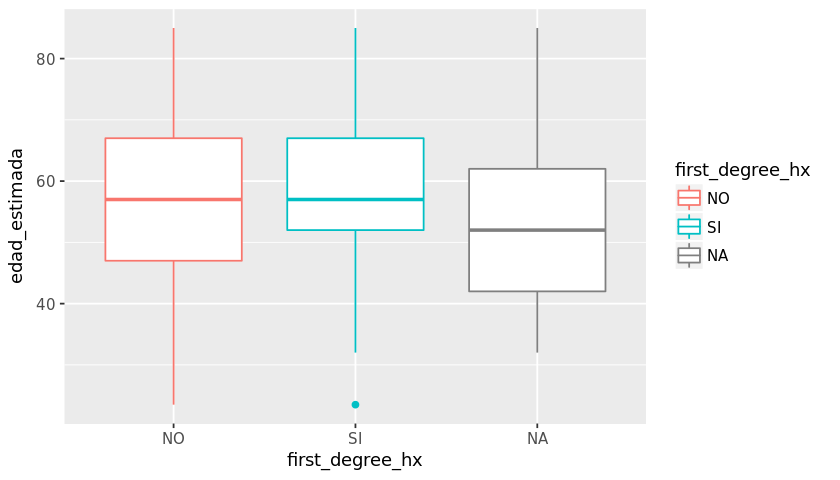

In [5]:
require(ggplot2)
options(repr.plot.width=7,repr.plot.height=4)
ggplot(data=df_sample,aes(x=first_degree_hx ,y=edad_estimada,color=first_degree_hx)) + geom_boxplot()

** Vemos que la mediana de edad es la misma tanto para los que tienen antecedentes como los que no.Solo hay un poco de difernecia entre los 48 y 51 años**

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [6]:
# Realizamos el test de shapiro para ver si la edad estimada en función de si se tienen antecendentes
# siguen una distribución normal
shapiro.test(df_sample$edad_estimada[df_sample$first_degree_hx=="SI"])$p.value
shapiro.test(df_sample$edad_estimada[df_sample$first_degree_hx=="NO"])$p.value

print("Con unos p-valores tan bajos, NO podemos asumir que siguen una distribución normal")
print("Realizaremos por tanto el test de Wilcox") 

wilcox.test(df_sample$edad_estimada[df_sample$first_degree_hx=="SI"],
                df_sample$edad_estimada[df_sample$first_degree_hx=="NO"])
mean(df_sample$edad_estimada[df_sample$first_degree_hx=="SI"],na.rm=T)
mean(df_sample$edad_estimada[df_sample$first_degree_hx=="NO"],na.rm=T)


[1] 2.604823e-11

[1] 2.996529e-31

[1] "Con unos p-valores tan bajos, NO podemos asumir que siguen una distribución normal"
[1] "Realizaremos por tanto el test de Wilcox"



	Wilcoxon rank sum test with continuity correction

data:  df_sample$edad_estimada[df_sample$first_degree_hx == "SI"] and df_sample$edad_estimada[df_sample$first_degree_hx == "NO"]
W = 1542200, p-value = 2.339e-06
alternative hypothesis: true location shift is not equal to 0


[1] 58.79579

[1] 56.49232

**Dado el valor tan bajo del pvalue, nos obliga a rechazar la hipotesis nula. Es decir, la edad de aparición de cancer es independiente de si se tienen antecedentes familiares o no**

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

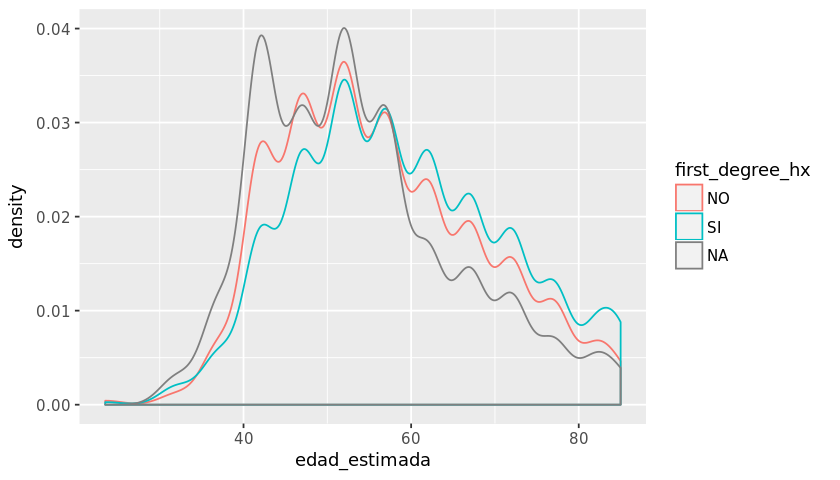

In [7]:
require(ggplot2)
options(repr.plot.width=7,repr.plot.height=4)
ggplot(data=df_sample,aes(x=edad_estimada,color=first_degree_hx)) + geom_density(bw=2)

** Al igual que en el diagrama de cajas, vemos que las funciones de densidad se solapan mucho y no se puede hacer una distinción clara entre los dos casos **

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

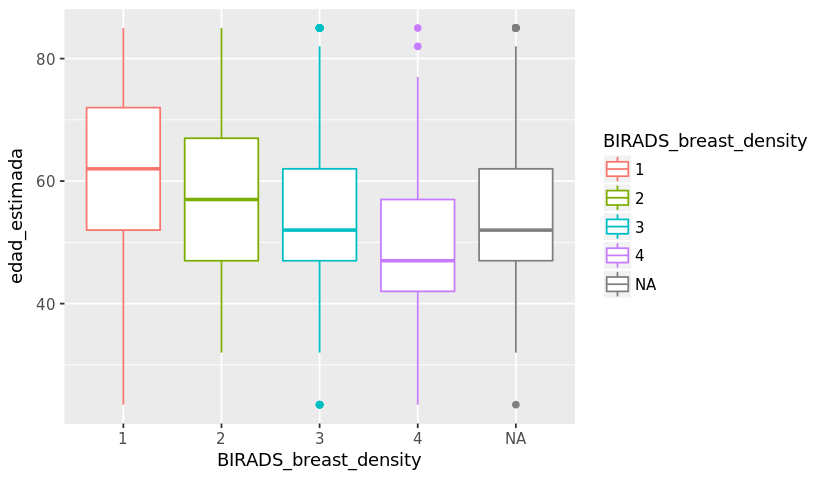

In [8]:
ggplot(data=df_sample,aes(x=BIRADS_breast_density ,y=edad_estimada,color=BIRADS_breast_density)) + geom_boxplot()

**En este caso vemos que a simple vista,si hay algo de diferéncia en las medianas y quizá se podría distinquir el caso 4**

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [9]:
# Mediante el test de shapiro miramos si la edad estimada para cada nivel sigue una distribución normal 
for (l in levels(df_sample$BIRADS_breast_density)){
    print(paste("BIRADS:",l,"pvalue:",
                shapiro.test(df_sample$edad_estimada[df_sample$BIRADS_breast_density==l])$p.value))    
}

# Con los pvaues tan bajos no podemos asumir mormalidad.
# Se trata de comparar medias entre diferentes grupos de datos. Si tuvieramos unas distribuciones gaussianas
# utiizaríamos el test de ANOVA, pero como no lo son, utilizaremos el test de Kruskal
kruskal.test(edad_estimada ~ BIRADS_breast_density, data=df_sample)              


[1] "BIRADS: 1 pvalue: 8.03867014659889e-05"
[1] "BIRADS: 2 pvalue: 2.01983358371917e-20"
[1] "BIRADS: 3 pvalue: 1.39606010020347e-20"
[1] "BIRADS: 4 pvalue: 3.40437954042275e-09"



	Kruskal-Wallis rank sum test

data:  edad_estimada by BIRADS_breast_density
Kruskal-Wallis chi-squared = 156.19, df = 3, p-value < 2.2e-16


**EL pvalue tan bajo de este test nos lleva a rechazar la hipotesis nula, lo que implica que la edad de detección no depende de manera significativa de la densidad del cancer **

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [10]:
# Creamos una tabla que nos de la frecuencia de cada tipo de cancer
frequencias_BIRADS <- table(df_sample$BIRADS_breast_density)
frequencias_BIRADS

# A simple vista diríamos que el tipo 2 es el mas comun
# Como los valores de la tabla de contingencia son altos, podemos realizar la prueba con el test de chi-cuadrado
chisq.test(frequencias_BIRADS)
# El pvalor es muy bajo, por lo que rechazamos la hipotesis nula y por tanto asumimos que no todos los tipos de cancer son igualmente probables


   1    2    3    4 
 297 1665 1451  256 


	Chi-squared test for given probabilities

data:  frequencias_BIRADS
X-squared = 1816.3, df = 3, p-value < 2.2e-16


 **El pvalor es muy bajo, por lo que rechazamos la hipotesis nula y por tanto asumimos que no todos los tipos de cancer son igualmente probables**

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [11]:
prob <- prop.table(frequencias_BIRADS)
prob
paste("El tipo de cancer más común es el Scattered fibroglandular densities con una proporción del ",round(prob[2]*100,2),"%")


         1          2          3          4 
0.08094849 0.45380213 0.39547561 0.06977378 

[1] "El tipo de cancer más común es el Scattered fibroglandular densities con una proporción del  45.38 %"

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [12]:
# Creamos la tabla de frecuencias entre las dos variables
frequencias <- table(df_sample[c("first_degree_hx","BIRADS_breast_density")])
frequencias

# Al igual que el caso anterior hacemos la prueba con el test chi-cuadrado
chisq.test(frequencias)
# El pvalor es alto, por lo que aceptamos la hipotesis nula y asumimos que no hay dependencia entre el tipo de cancer y si ha habido o no antecedentes familiares

               BIRADS_breast_density
first_degree_hx    1    2    3    4
             NO  223 1324 1135  190
             SI   56  248  229   45


	Pearson's Chi-squared test

data:  frequencias
X-squared = 4.2475, df = 3, p-value = 0.236


**El pvalor es alto, por lo que aceptamos la hipotesis nula y asumimos que no hay dependencia entre el tipo de cancer y si ha habido o no antecedentes familiares**

¿Depende el tipo de cancer BIRADS del grupo étnico?

In [13]:

# Creamos la tabla de frecuencias entre las dos variables
frequencias_etnico <- table(df_sample[c("race_eth","BIRADS_breast_density")])
frequencias_etnico

# Al igual que el caso anterior hacemos la prueba con el test chi-cuadrado
chisq.test(frequencias_etnico)
# El Warning que da el test de chi.cuadrado entiendo que es por las pocas muestras que hay en algunos grupos, por lo que 
# aplicamos también el test de Fisher
fisher.test(frequencias_etnico,simulate.p.value=TRUE)

        BIRADS_breast_density
race_eth    1    2    3    4
       1  204 1208 1021  179
       2   23  100   92   11
       3   11   51   85   29
       4    1    7    6    3
       5   26   98   94   11
       6    2   19   15    3

Warning message in chisq.test(frequencias_etnico):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  frequencias_etnico
X-squared = 48.684, df = 15, p-value = 1.971e-05



	Fisher's Exact Test for Count Data with simulated p-value (based on
	2000 replicates)

data:  frequencias_etnico
p-value = 0.0004998
alternative hypothesis: two.sided


**En los dos tests ha dado unos pvalues muy bajos con lo que rechazamos la hipótesis nula y asumimos que si hay una dependencia entre los grupos étnicos y el cancer**

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

Suponiendo que nos fijemos solamente en la raza *Native American* (tipo 4), ¿cual es la probabilidad de que tenga un cancer de tipo *Almost entirely fat*(tipo 1)?

\\[
P(\text{Almost entirely fat|Native American})=\frac{1}{1+7+6+3}=0.0588235
\\]

In [14]:
# Obtenemos la matriz de probabilidades condicionales
pt <-prop.table(frequencias_etnico,margin = 1)
pt
paste("Un Nativo americano tiene una probabilidad de tener cancer tipo Almost entirely fat de:",round(pt[4,1]*100,2),'%')

        BIRADS_breast_density
race_eth          1          2          3          4
       1 0.07810107 0.46248086 0.39088821 0.06852986
       2 0.10176991 0.44247788 0.40707965 0.04867257
       3 0.06250000 0.28977273 0.48295455 0.16477273
       4 0.05882353 0.41176471 0.35294118 0.17647059
       5 0.11353712 0.42794760 0.41048035 0.04803493
       6 0.05128205 0.48717949 0.38461538 0.07692308

[1] "Un Nativo americano tiene una probabilidad de tener cancer tipo Almost entirely fat de: 5.88 %"

In [15]:
# Tambien podemos estimar la probabilidad con una binomial 
cancer_tipo1 <- frequencias_etnico[4,1]
cancer_NO_tipo1 <- sum(frequencias_etnico[4,2:ncol(frequencias_etnico)])

# Hacemos un test binomial con los casos positivos (cancer_tipo1) y todos los casos posibles (cancer_tipo1+cancer_NO_tipo1)
Almost_entirely_fat <- binom.test(cancer_tipo1,cancer_tipo1+cancer_NO_tipo1)
Almost_entirely_fat
estimado <- Almost_entirely_fat$estimate
int_inf <- Almost_entirely_fat$conf.int[1]
int_sup <- Almost_entirely_fat$conf.int[2]

paste("Un Nativo americano tiene una probabilidad de tener cancer tipo Almost entirely fat de:",round(estimado*100,2),'% ')
paste("El 95% de los casos estarán dentro del intervalo:[",round(int_inf,3)*100,"% y ",round(int_sup,3)*100,"%]")



	Exact binomial test

data:  cancer_tipo1 and cancer_tipo1 + cancer_NO_tipo1
number of successes = 1, number of trials = 17, p-value = 0.0002747
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.001488174 0.286889397
sample estimates:
probability of success 
            0.05882353 


[1] "Un Nativo americano tiene una probabilidad de tener cancer tipo Almost entirely fat de: 5.88 % "

[1] "El 95% de los casos estarán dentro del intervalo:[ 0.1 % y  28.7 %]"